In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Загружаем данные в датасет
Ссылка на датасет : https://archive.ics.uci.edu/dataset/429/cryotherapy+dataset

In [67]:
dataset = pd.read_csv('/content/cryo.csv')
dataset_graph = pd.read_csv('/content/cryo.csv')

Анализ данных

In [68]:
dataset.shape

(90, 7)

In [69]:
dataset.head(10)

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0
5,1,41,8.00,2,2,20,1
6,1,36,11.00,2,1,8,0
7,1,59,3.50,3,3,20,0
8,1,20,4.50,12,1,6,1
9,2,34,11.25,3,3,150,0


In [70]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [72]:
dataset.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [73]:
dataset['Result_of_Treatment'].unique()

array([0, 1])

In [74]:
dataset['Result_of_Treatment'].value_counts()

,count
Result_of_Treatment,
1,48
0,42


Нормализация данных

In [75]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset[['nAge', 'nNumber_of_Warts', 'nTime', 'nArea']] = scaler_mm.fit_transform(dataset[['age', 'Number_of_Warts', 'Time', 'Area']])
dataset.head()

dataset.drop(columns= ['Number_of_Warts', 'Time', 'Area','age'], inplace=True)

Визуализация данных

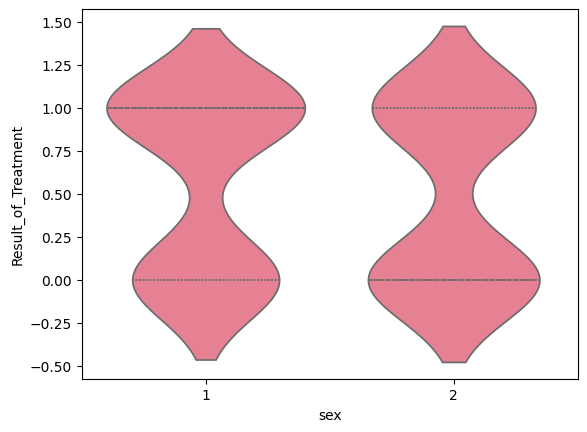

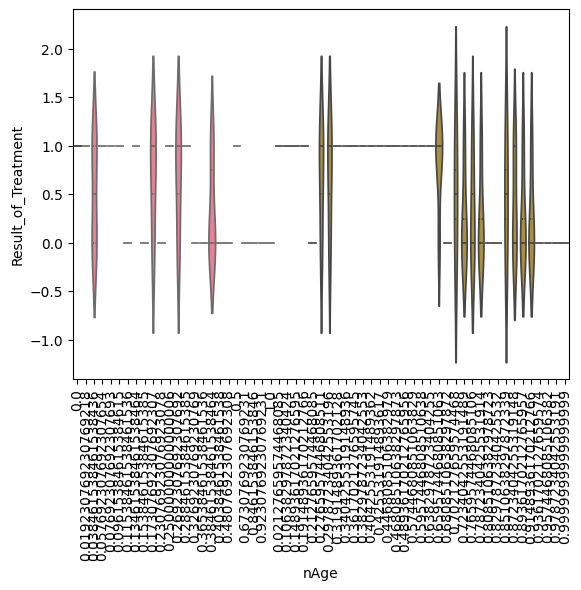

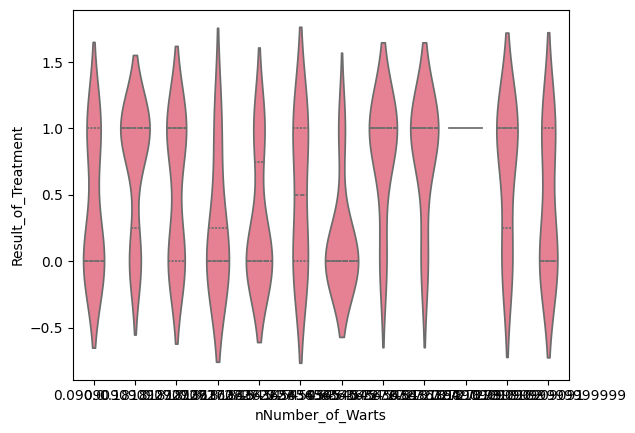

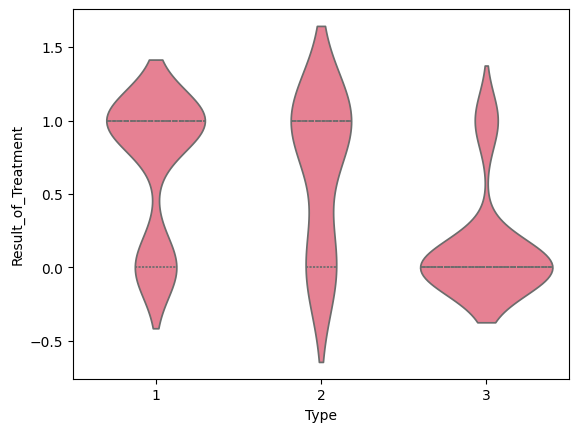

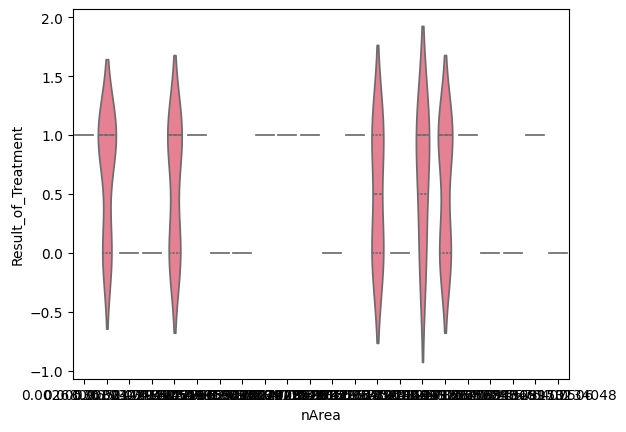

In [78]:
sns.violinplot(y='Result_of_Treatment', x='sex', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Result_of_Treatment', x='nAge', data=dataset, inner='quartile')
plt.xticks(rotation=90)
sns.violinplot(y='Result_of_Treatment', x='nTime', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Result_of_Treatment', x='nNumber_of_Warts', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Result_of_Treatment', x='Type', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Result_of_Treatment', x='nArea', data=dataset, inner='quartile')
plt.show()



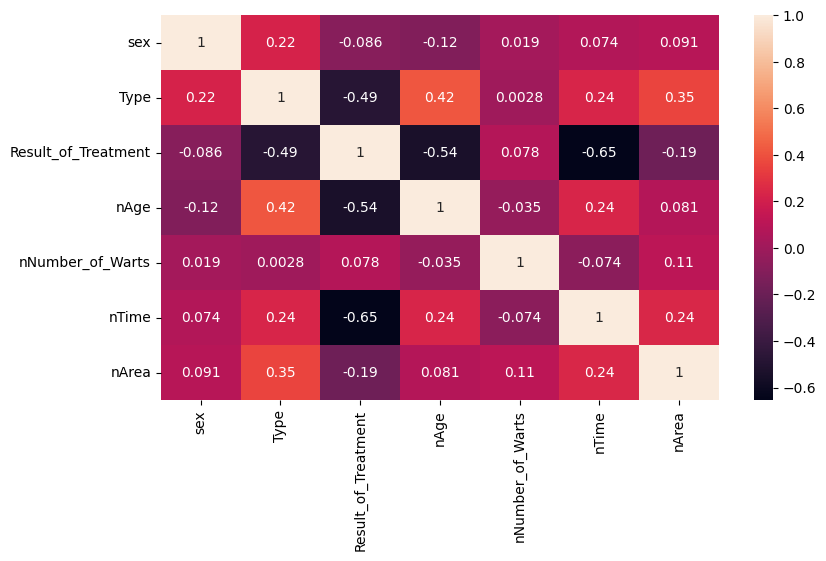

In [79]:
plt.figure(figsize=(9,5))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

Построение модели

In [80]:
X = dataset.drop(['Result_of_Treatment'], axis=1)
y = dataset['Result_of_Treatment']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (90, 6) | y shape: (90,) 


In [81]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

t_test_result = stats.ttest_ind(a=y_train, b=y_test)

#print(t_test_result)

In [82]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)

In [83]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=7, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.780519 (0.159724)
LDA: 0.848052 (0.136814)
KNN: 0.837662 (0.181781)
CART: 0.877922 (0.078483)
NB: 0.823377 (0.163626)
SVC: 0.766234 (0.104978)


In [85]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

svc_pred_res = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_pred_res)

print(f'SVC accuracy: {svc_accuracy}')


SVC accuracy: 0.6111111111111112


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


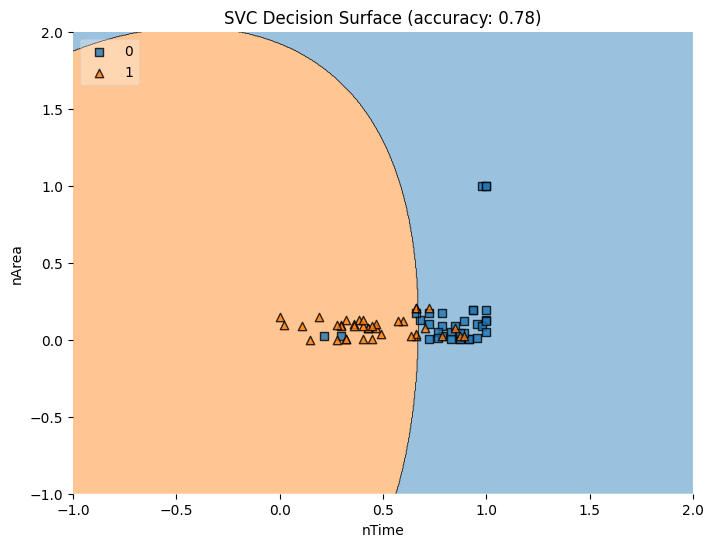

In [89]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Для визуализации выберем два признака
X_2d = X_train[['nTime', 'nArea']].values
y_2d = y_train.values

# Инициализация и обучение модели SVC с оптимизированными параметрами (или gamma='auto')
svc_model = SVC(gamma='auto')
svc_model.fit(X_2d, y_2d)

# Вычисление точности
svc_pred_res = svc_model.predict(X_test[['nTime', 'nArea']])
svc_accuracy = accuracy_score(y_test, svc_pred_res)

# Визуализация областей решений
plt.figure(figsize=(8, 6))
plt.title(f'SVC Decision Surface (accuracy: {svc_accuracy:.2f})')
plot_decision_regions(X=X_2d, y=y_2d, clf=svc_model, legend=2)

plt.xlabel('nTime')
plt.ylabel('nArea')
plt.show()


In [90]:
from sklearn import metrics
import numpy as np

accuracy = metrics.accuracy_score(y_test, svc_pred_res)
print(f'Accuracy: {round(accuracy, 2)}')

recall = metrics.recall_score(y_test, svc_pred_res, average="weighted")
precision = metrics.precision_score(y_test, svc_pred_res, average="weighted")
print("Recall (полнота для всех классов):", round(recall, 2))
print("Precision (точность для всех классов):", round(precision, 2))

print("Classification Report:")
print(metrics.classification_report(y_test, svc_pred_res, target_names=[str(i) for i in np.unique(y_test)]))


Accuracy: 0.78
Recall (полнота для всех классов): 0.78
Precision (точность для всех классов): 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.88      0.70      0.78        10

    accuracy                           0.78        18
   macro avg       0.79      0.79      0.78        18
weighted avg       0.80      0.78      0.78        18

